# Regression logistique multinomial & binaire

## 1. Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## 2. Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
* Pregnancies : Number of times pregnant
* Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure : Diastolic blood pressure (mm Hg)
* SkinThickness : Triceps skin fold thickness (mm)
* Insulin : 2-Hour serum insulin (mu U/ml)
* BMI : Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction : Diabetes pedigree function
* Age : Age (years)
* Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 3. Exercice

Appliquez le modèle de régression logistique sur la dataset “pima“ qui a pour objectif de prévoir si un patient est diabétique ou non.:https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import itertools
from random import randint
from sklearn import decomposition, preprocessing
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
try:
    from sklearn.utils._testing import ignore_warnings
except ImportError:
    from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from datetime import datetime
from os import getcwd
from mpl_toolkits.mplot3d import Axes3D
from joblib import dump, load

In [33]:
PLOT_FIGURE_BAGROUNG_COLOR = 'white'
PLOT_BAGROUNG_COLOR = PLOT_FIGURE_BAGROUNG_COLOR

# ----------------------------------------------------------------------------------
#                        GRAPHIQUES
# ----------------------------------------------------------------------------------
def color_graph_background(ligne=1, colonne=1):
    figure, axes = plt.subplots(ligne,colonne)
    figure.patch.set_facecolor(PLOT_FIGURE_BAGROUNG_COLOR)
    if isinstance(axes, np.ndarray):
        for axe in axes:
            # Traitement des figures avec plusieurs lignes
            if isinstance(axe, np.ndarray):
                for ae in axe:
                    ae.set_facecolor(PLOT_BAGROUNG_COLOR)
            else:
                axe.set_facecolor(PLOT_BAGROUNG_COLOR)
    else:
        axes.set_facecolor(PLOT_BAGROUNG_COLOR)
    return figure, axes

In [3]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
verboseMain = False

print("Chargement des données...")
# Récupère le répertoire du programme
file_path = getcwd() + "\\"
file_name = 'diabetes.csv'
df_origin = pd.read_csv(file_path+file_name, sep=',')
print("Chargement des données", df_origin.shape, ".... ...................................... END")

Chargement des données...
Chargement des données (768, 9) .... ...................................... END


In [4]:
df_origin.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df_origin.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df_origin.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df_origin.describe(include="all")

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
df_origin.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
target_name = "Outcome"
data_names = list(df_origin.columns)
data_names.remove(target_name)
data_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [28]:
# Il faut faire le split avant pour avoir toujours la même répartition pour comparer les différents résultats
# Fixer le random state pour avoir tout le temps le même split
X_train, X_test, y_train, y_test = train_test_split(df_origin[data_names], df_origin[target_name], train_size=0.8, random_state = 8)

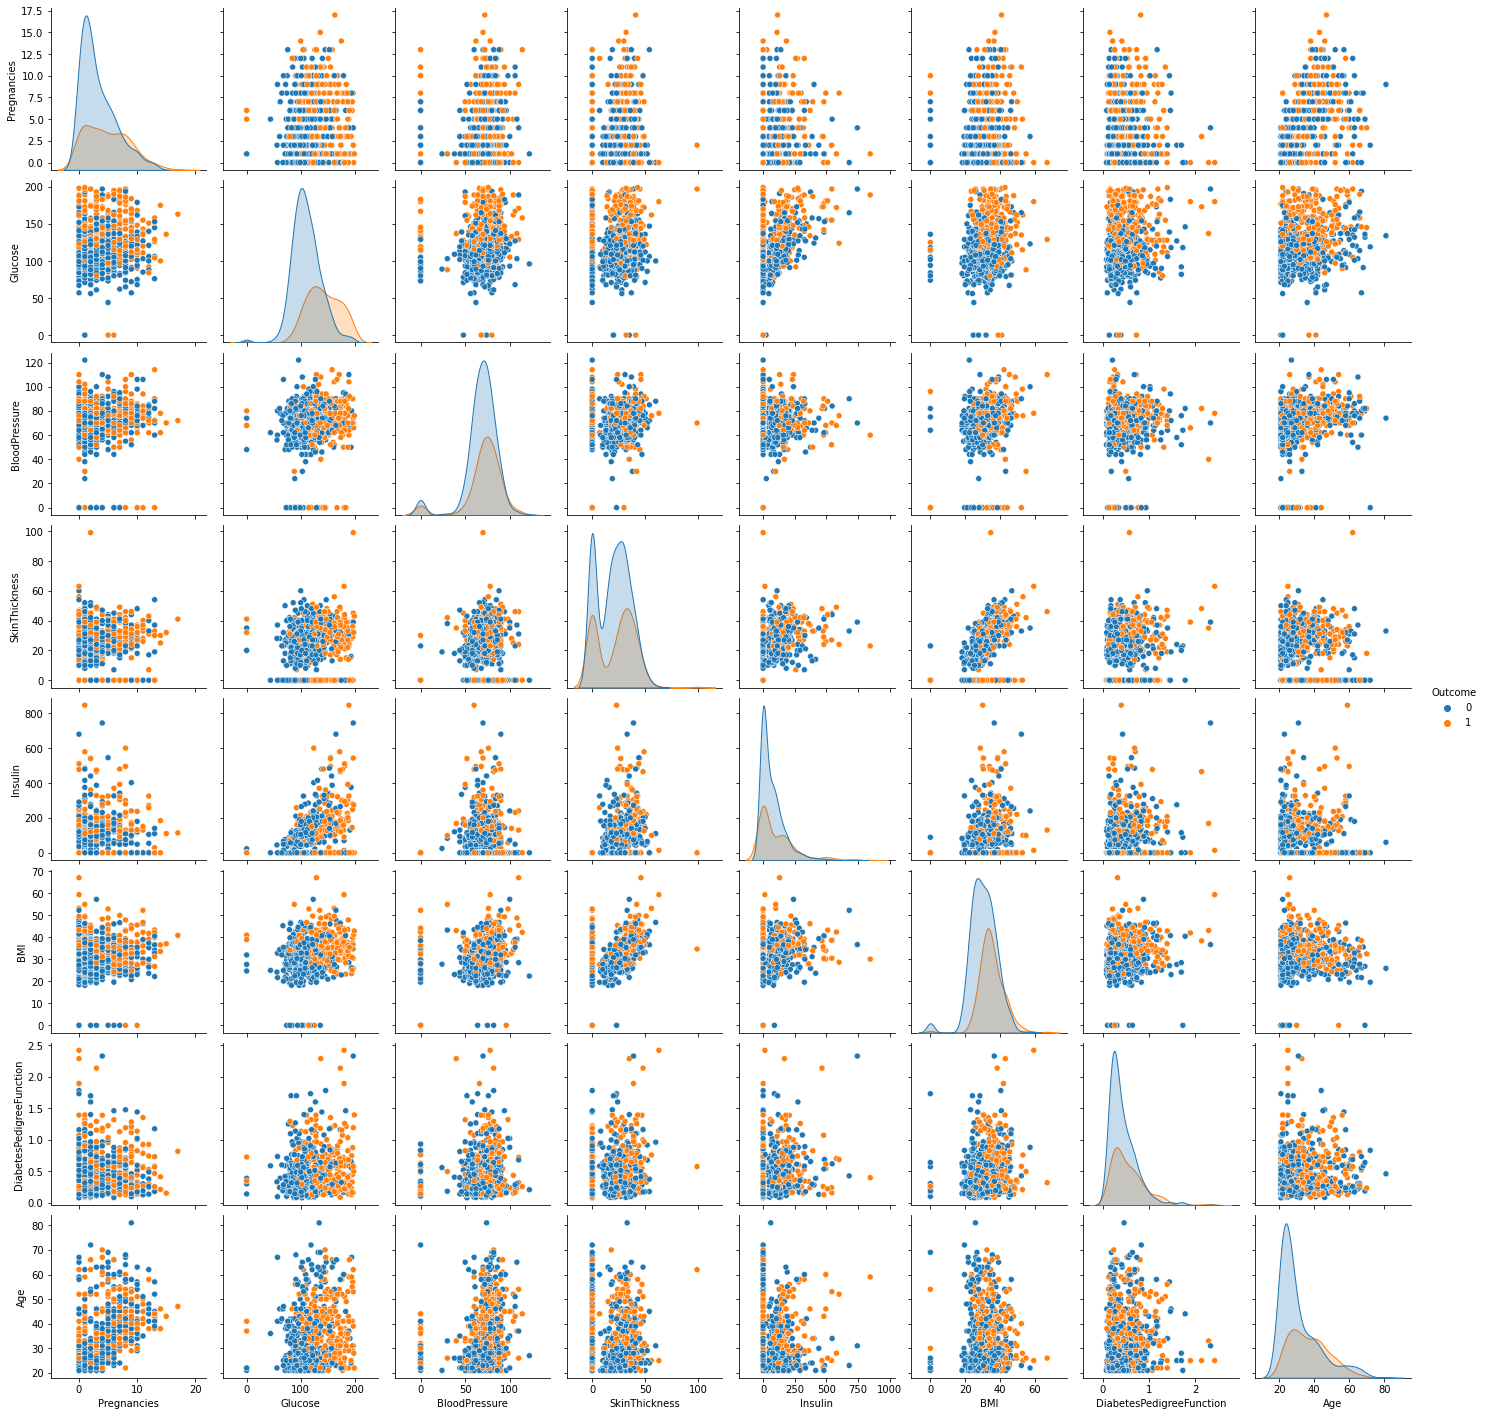

In [26]:
g = sns.pairplot(df_origin, hue=target_name)

CORR ------------------


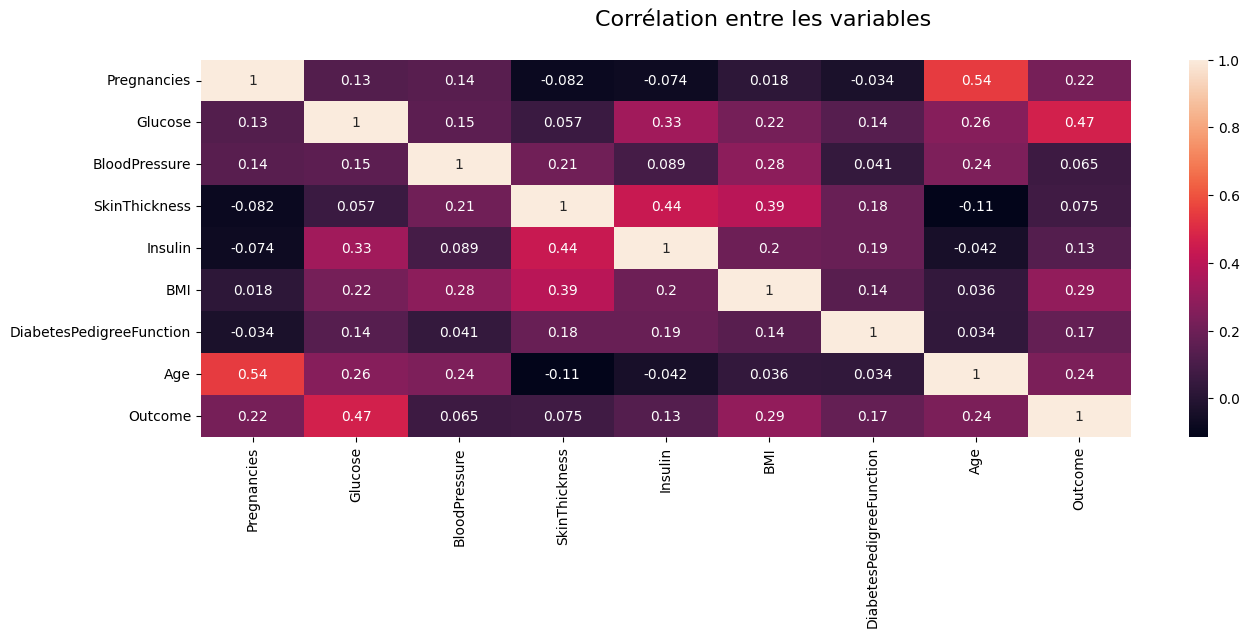

In [34]:
##on utilise data.corr et le heatmap de seborn
corr_df = df_origin.corr()
print("CORR ------------------")
#print(corr_df, "\n")
figure, ax = color_graph_background(1,1)
figure.set_size_inches(15, 5, forward=True)
figure.set_dpi(100)
figure.suptitle("Corrélation entre les variables", fontsize=16)
sns.heatmap(corr_df, annot=True)
plt.show()

In [27]:
df_origin.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [59]:
def draw_simple_graph(col1, X_train, y_train):
    X1 = X_train[col1]

    # Put the result into a color plot
    figure, axes = plt.subplots(1,1)
    figure.patch.set_facecolor("white")
    
    # Plot also the training points
    axes.plot(X1.loc[y_train==0, col1[0]], X1.loc[y_train==0, col1[1]], "go", label="Non diabetique")
    axes.plot(X1.loc[y_train==1, col1[0]], X1.loc[y_train==1, col1[1]], "rs", label="Diabetique")
    plt.xlabel(col1[0])
    plt.ylabel(col1[1])

    plt.legend()
    figure.set_size_inches(10, 5, forward=True)
    plt.show()

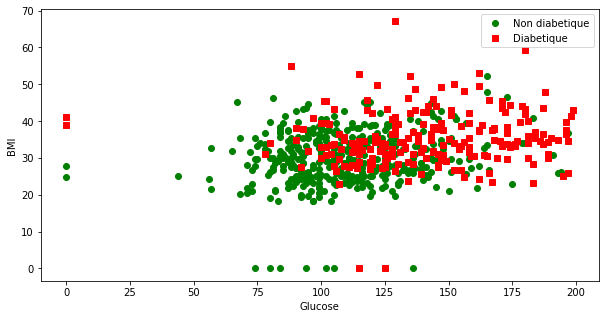

In [60]:
col1 = ['Glucose', 'BMI']
draw_simple_graph(col1, X_train, y_train)

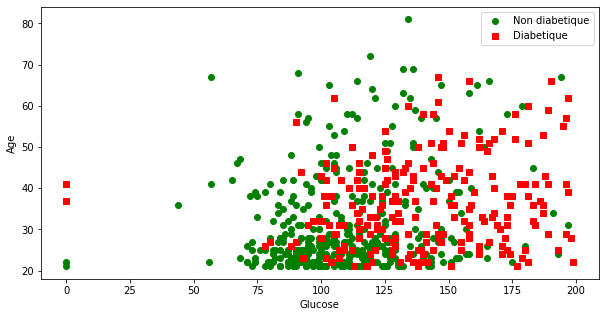

In [63]:
col1 = ['Glucose', 'Age']
draw_simple_graph(col1, X_train, y_train)

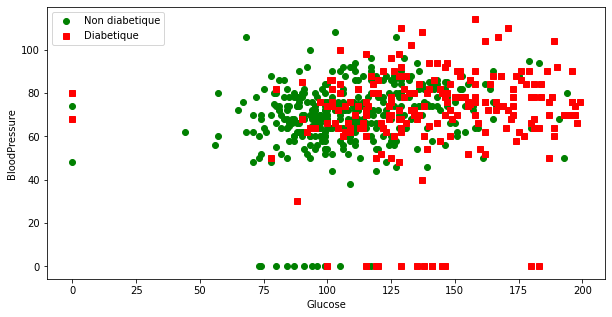

In [67]:
col1 = ['Glucose', 'BloodPressure']
draw_simple_graph(col1, X_train, y_train)

In [97]:
def draw_regression_3d(df, col_x, col_y, col_z, col_hue): 
    ax = plt.figure(figsize=(16, 8)).gca(projection='3d')

    ax.plot(df.loc[df[col_hue]==0, col_x], df.loc[df[col_hue]==0, col_y], df.loc[df[col_hue]==0, col_z], 'go', label='Non diabétique')
    ax.plot(df.loc[df[col_hue]==1, col_x], df.loc[df[col_hue]==1, col_y], df.loc[df[col_hue]==1, col_z], 'rs', label='Diabétique')
    ax.legend()
    
    ax.set_xlabel(col_x)
    ax.set_ylabel(col_y)
    ax.set_zlabel(col_z)
    # ax.set_zlabel(col_z, rotation=60)
    plt.xticks(rotation=45, ha="right")
    plt.title("x="+col_x + ", y=" + col_y+ ", z=" + col_z+ " par " + col_hue)

    # plt.legend()
    plt.show()

In [150]:
def draw_regression_3d_xgraphes(df, columns_started, col_hue): 
 
    for subset in itertools.combinations(columns_started, 3):
        columns = list(subset)
        figure = plt.figure()
        ax = figure.add_subplot(1, 1, 1, projection='3d')
        ax.plot(df.loc[df[col_hue]==0, columns[0]], df.loc[df[col_hue]==0, columns[1]], df.loc[df[col_hue]==0, columns[2]], 'go', label='Non diabétique')
        ax.plot(df.loc[df[col_hue]==1, columns[0]], df.loc[df[col_hue]==1, columns[1]], df.loc[df[col_hue]==1, columns[2]], 'rs', label='Diabétique')
        ax.set_title("x="+columns[0] + ", y=" + columns[1]+ ", z=" + columns[2]+ " par " + col_hue)
        ax.legend()
        ax.set_xlabel(columns[0])
        ax.set_ylabel(columns[1])
        ax.set_zlabel(columns[2])

        figure.set_size_inches(15, 5, forward=True)
        figure.set_dpi(100)
        figure.patch.set_facecolor(PLOT_FIGURE_BAGROUNG_COLOR)
        plt.show()

In [134]:
def draw_regression_3d_xgraphes_save(df, columns_started, col_hue): 

    combine = itertools.combinations(columns_started, 3)
    combine = itertools.combinations(columns_started, 3)
    length = sum(1 for ignore in combine)

    nb_lignes = 1
    nb_colonnes = 1

    i = 5

    while i > 1:
        if length % i == 0:
            nb_colonnes = i
            break
        i -= 1
    nb_colonnes = 2
    nb_lignes = int(length/nb_colonnes)
    print("length:", length, ", nb_lignes :", nb_lignes,", nb_colonnes :",nb_colonnes)
    figure, axes = plt.subplots(nb_lignes,nb_colonnes)
    figure.gca(projection='3d')   

    i = 1
    j = 1
    z = 1
    for subset in itertools.combinations(columns_started, 3):
        columns = list(subset)
        print(i, j, z)
        ax = figure.add_subplot(i, j, z, projection='3d', animated=True, navigate=True)
        ax.gca(projection='3d') 
        axes[i,j].plot(df.loc[df[col_hue]==0, columns[0]], df.loc[df[col_hue]==0, columns[1]], df.loc[df[col_hue]==0, columns[2]], 'go', label='Non diabétique')
        axes[i,j].plot(df.loc[df[col_hue]==1, columns[0]], df.loc[df[col_hue]==1, columns[1]], df.loc[df[col_hue]==1, columns[2]], 'rs', label='Diabétique')
        axes[i,j].set_title("x="+columns[0] + ", y=" + columns[1]+ ", z=" + columns[2]+ " par " + col_hue)
        axes[i,j].legend()
        axes[i,j].set_xlabel(columns[0])
        axes[i,j].set_ylabel(columns[1])
        axes[i,j].set_zlabel(columns[2])
        z += 1
        j += 1

        if j == nb_colonnes:
            j = 0
            i += 1
    figure.set_size_inches(15, nb_colonnes*5, forward=True)
    figure.set_dpi(100)
    figure.patch.set_facecolor(PLOT_FIGURE_BAGROUNG_COLOR)
    plt.show()

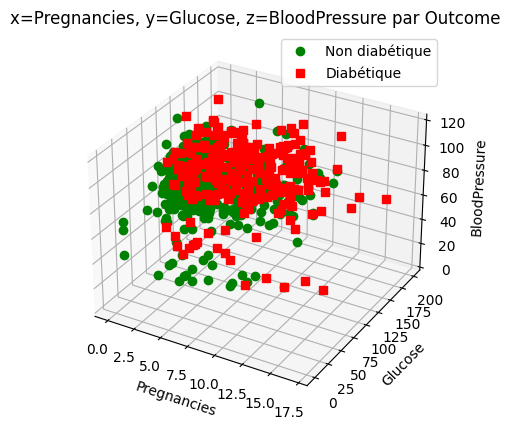

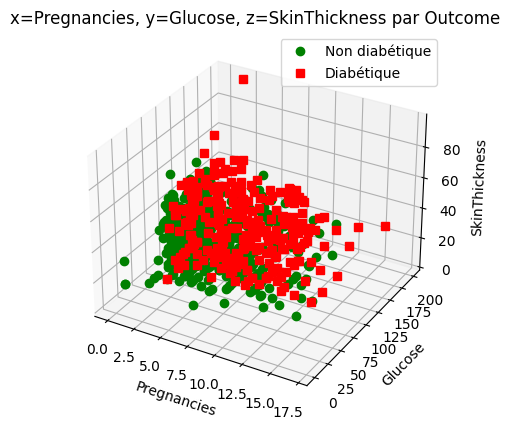

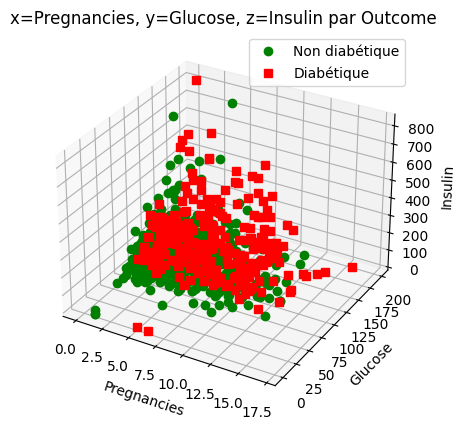

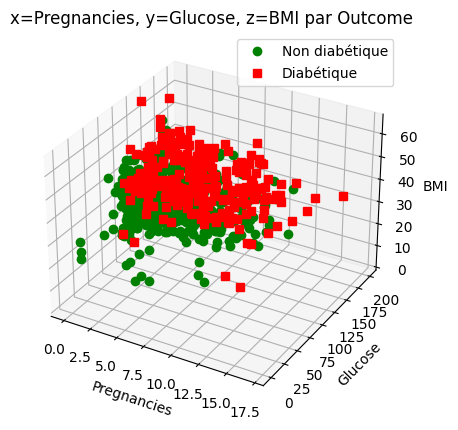

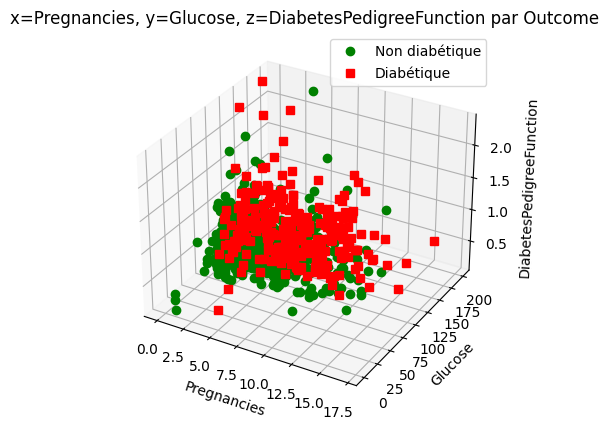

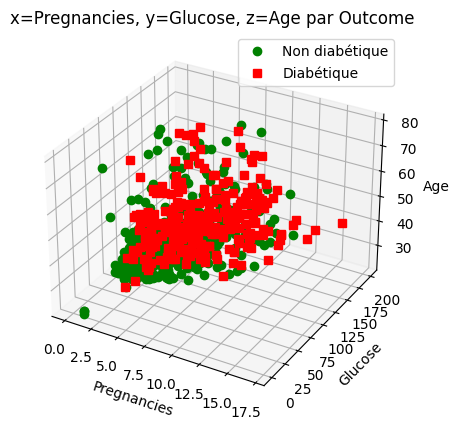

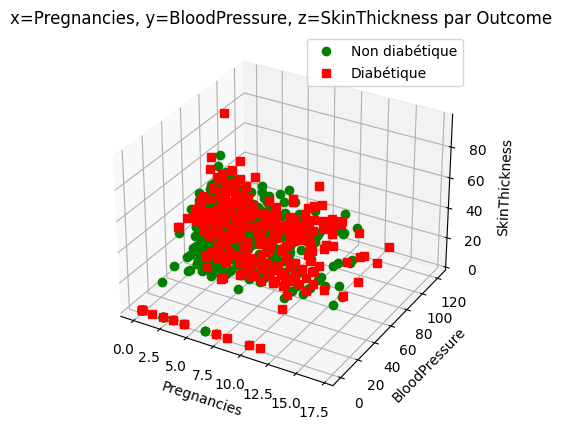

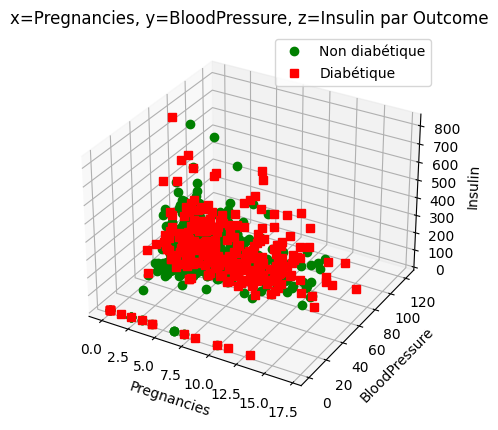

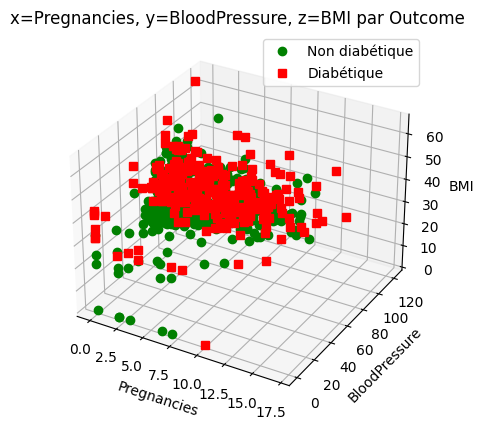

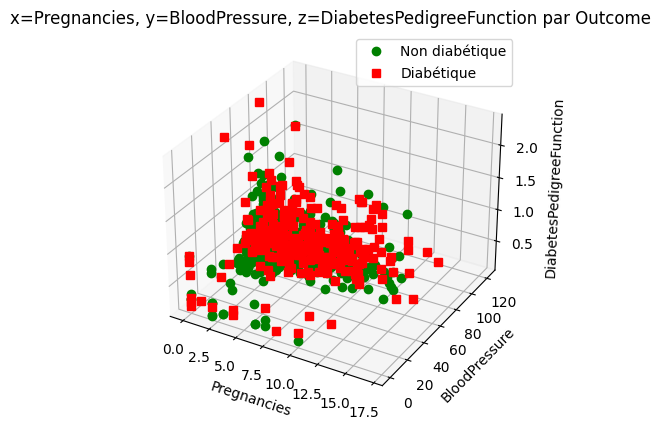

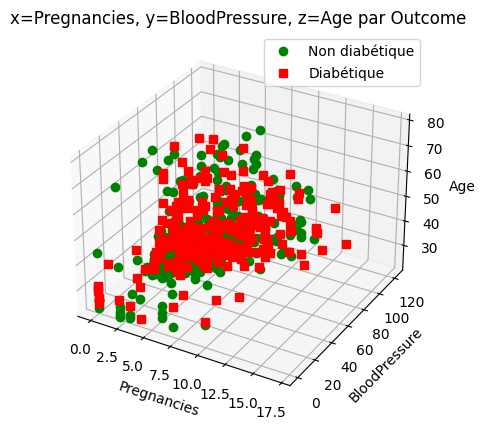

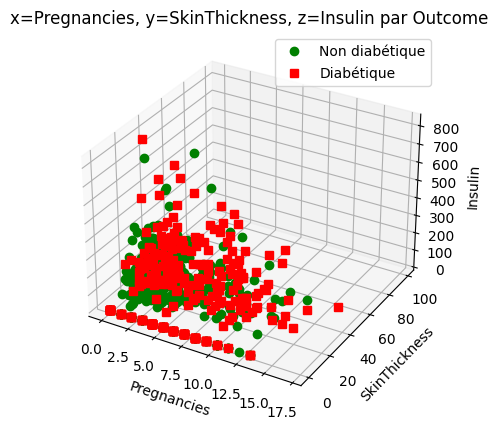

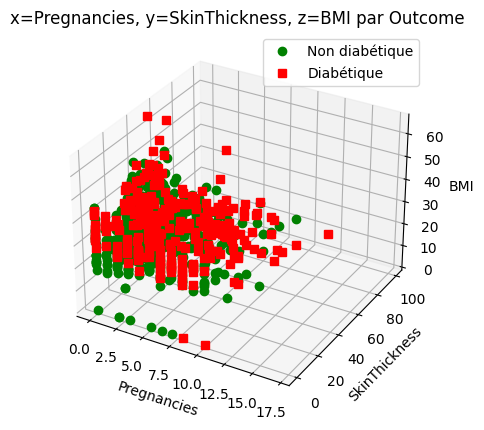

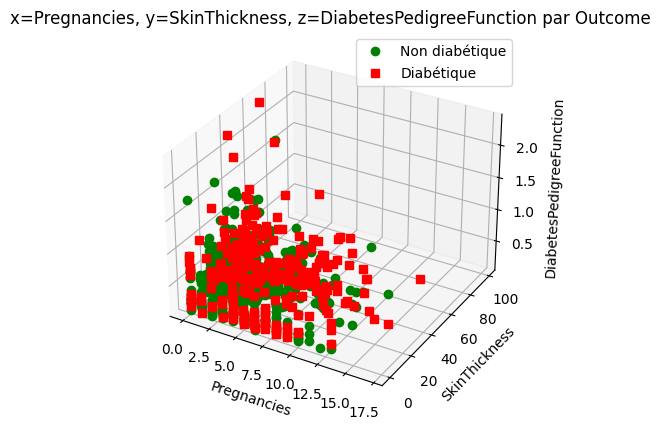

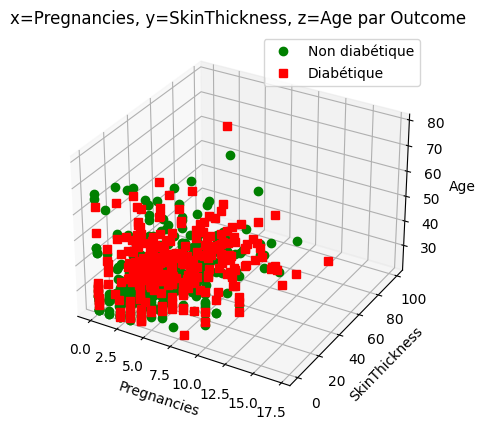

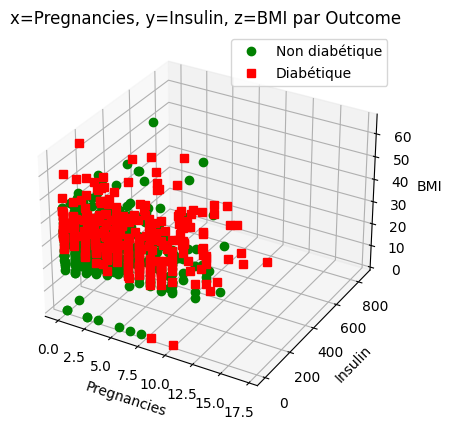

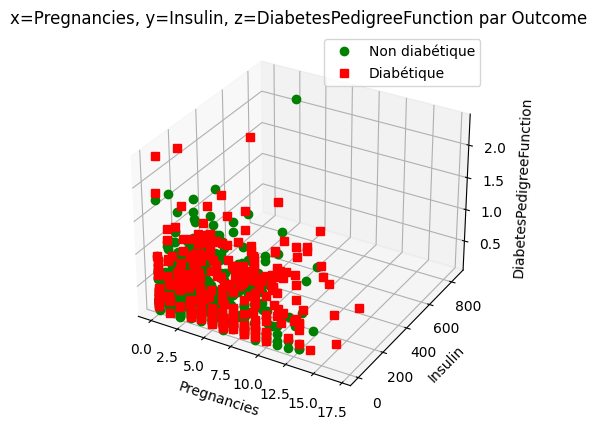

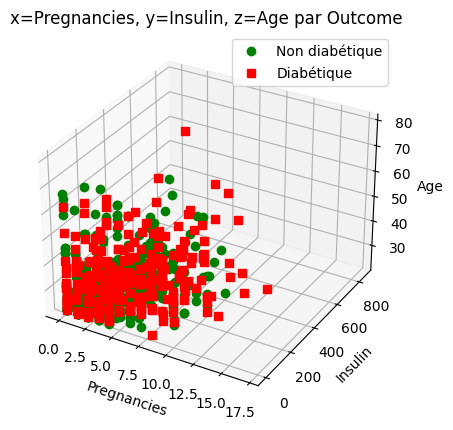

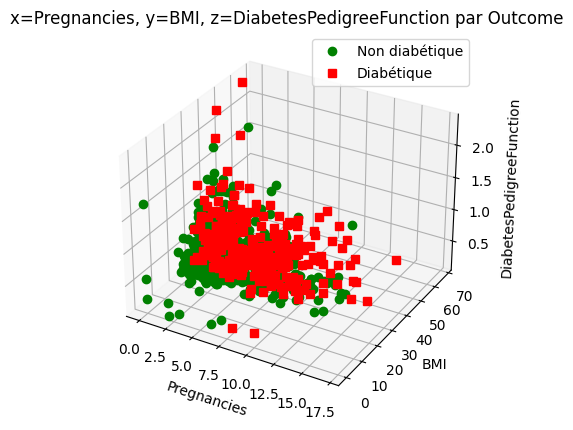

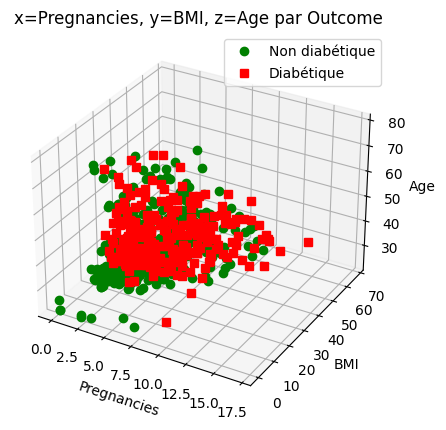

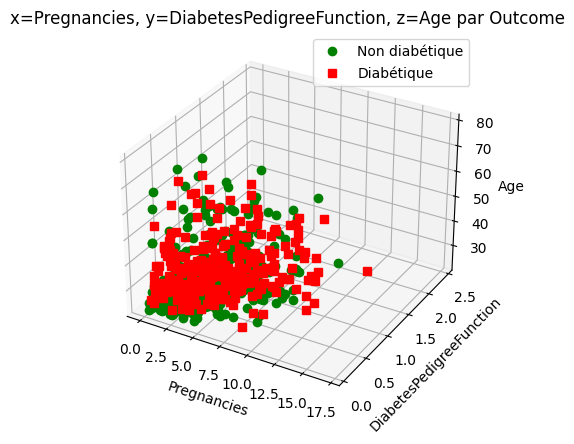

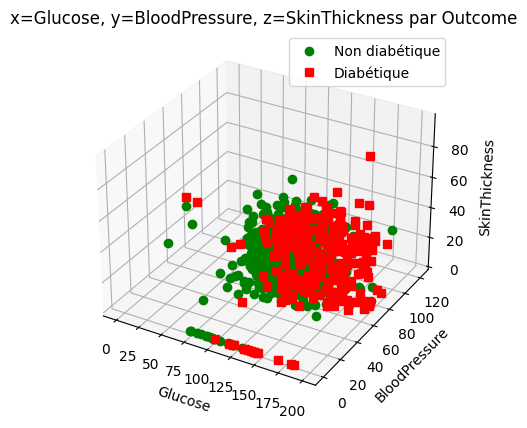

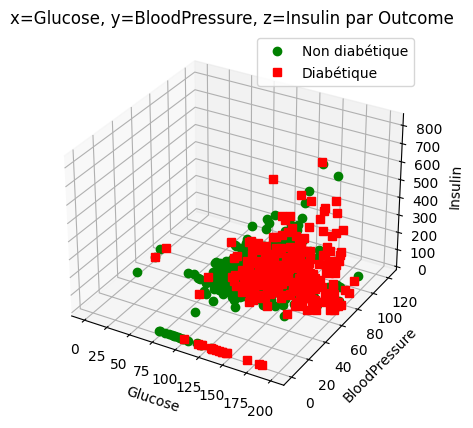

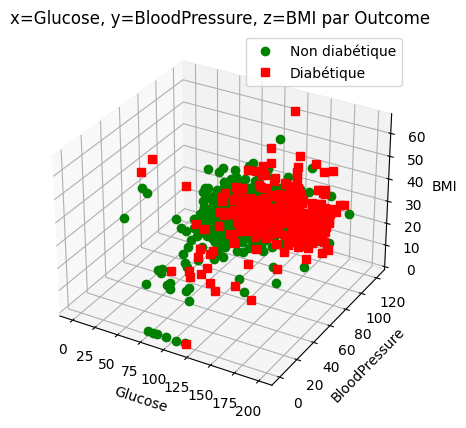

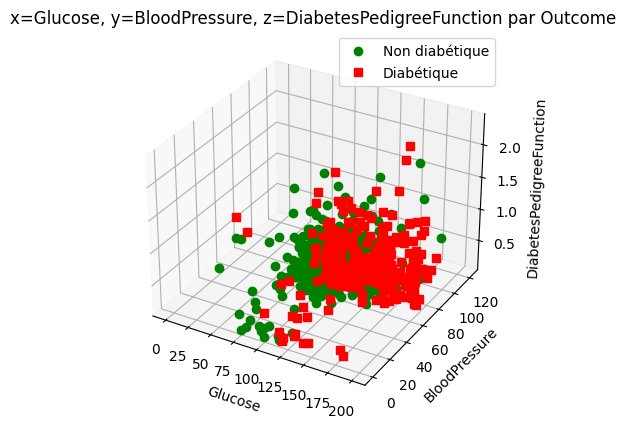

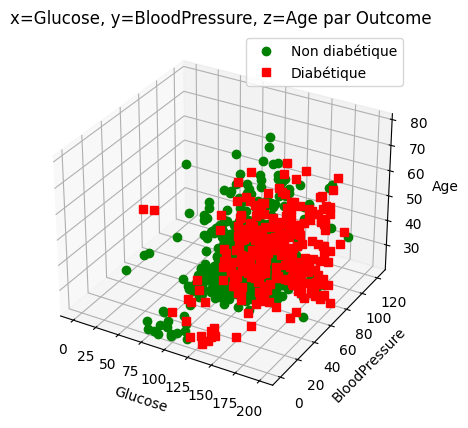

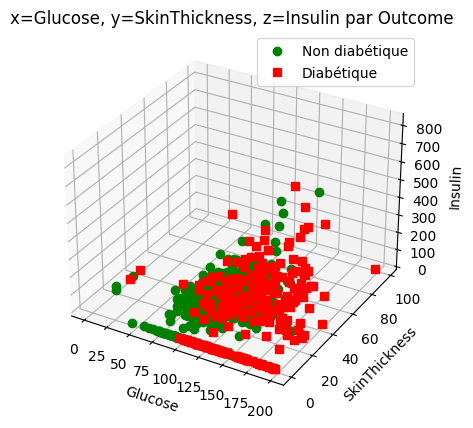

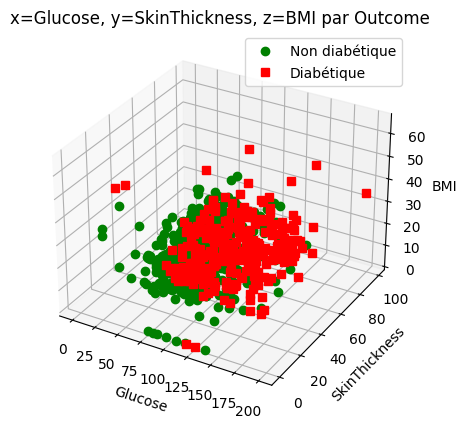

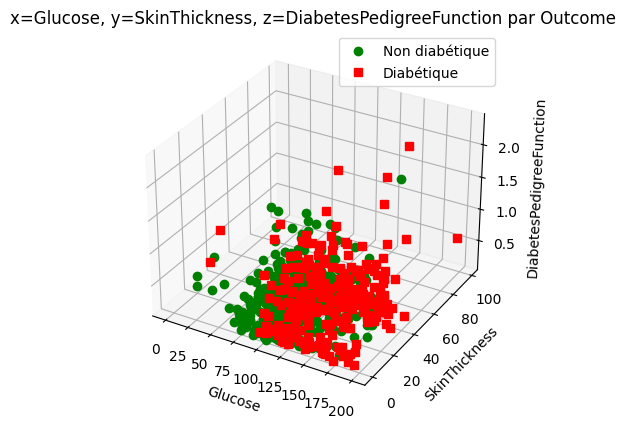

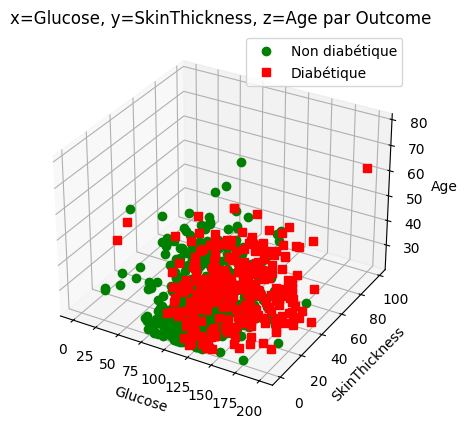

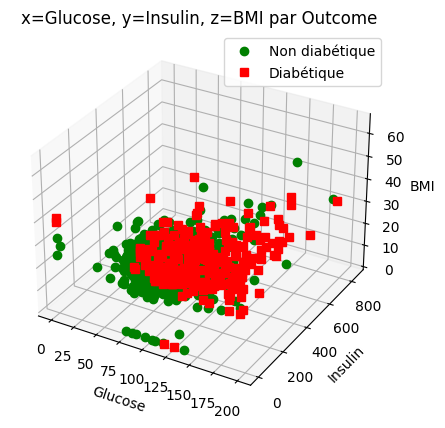

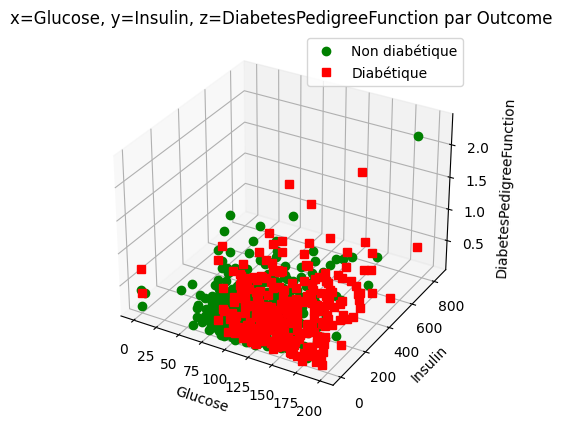

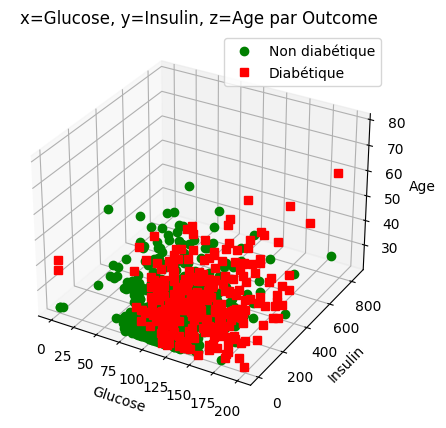

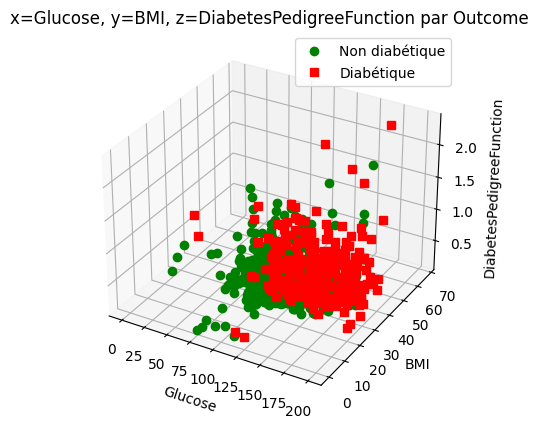

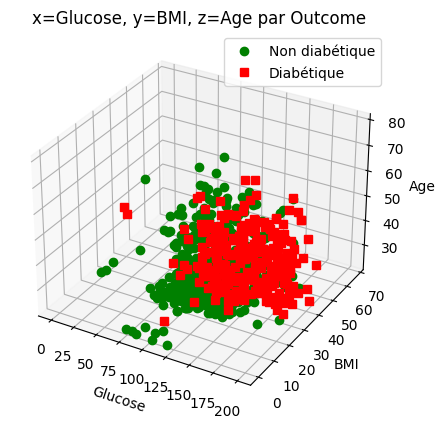

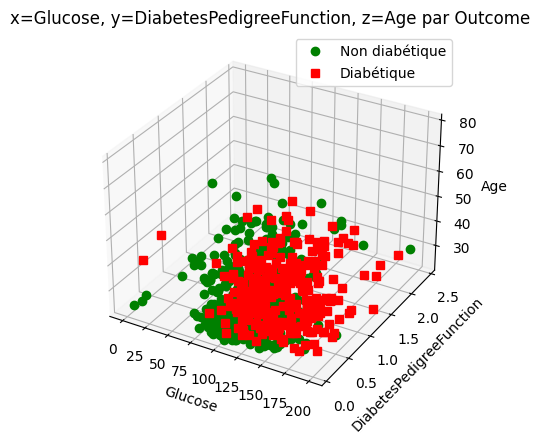

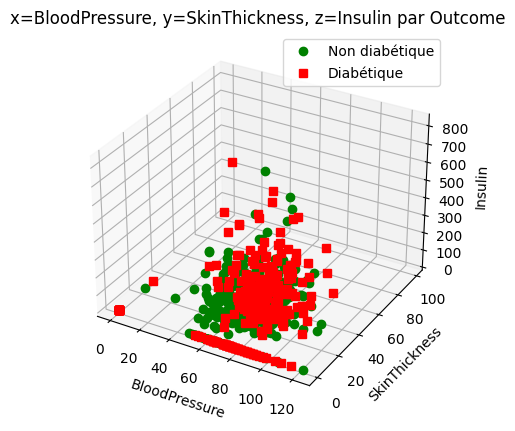

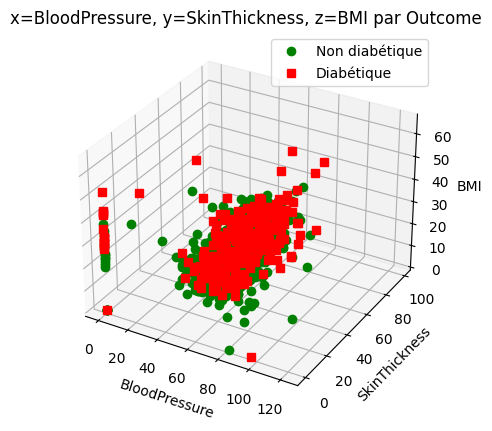

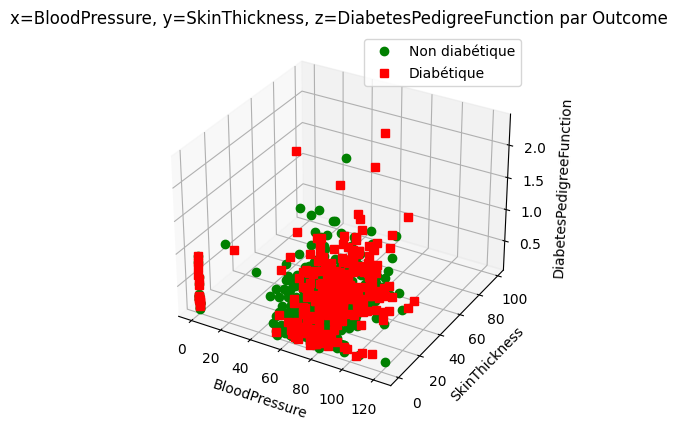

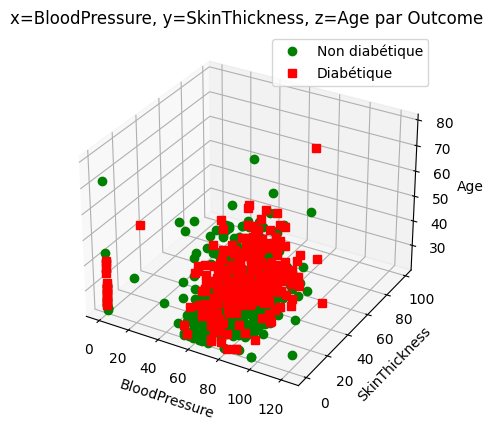

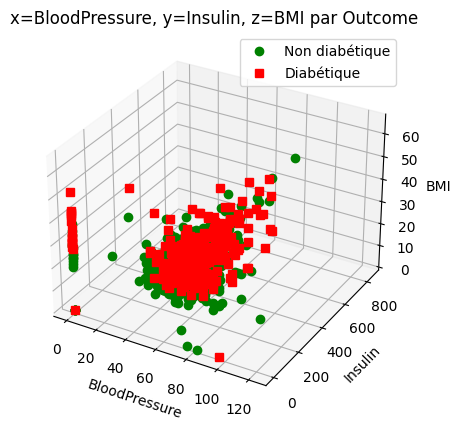

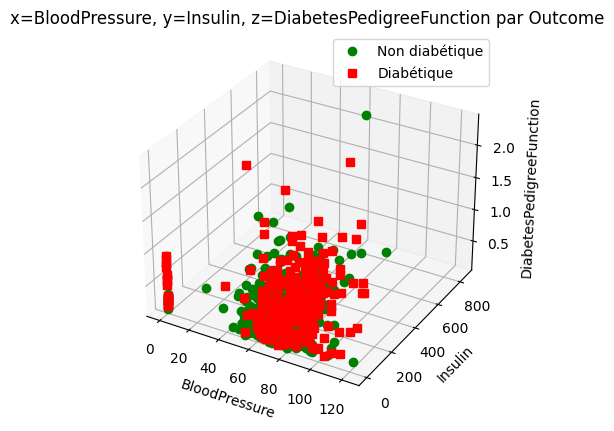

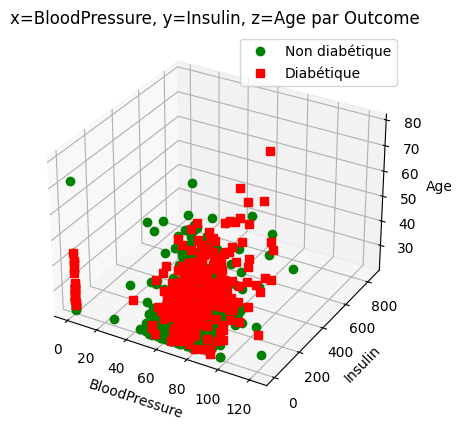

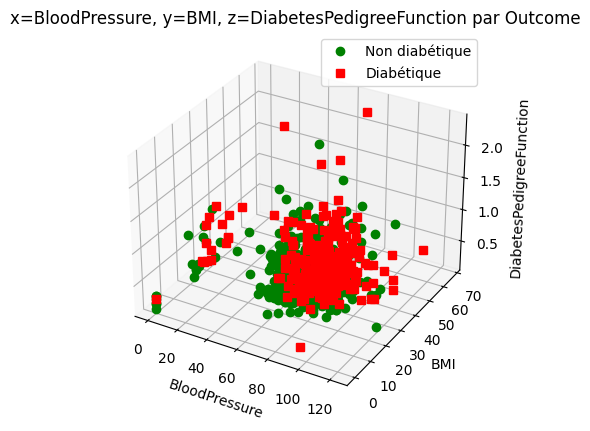

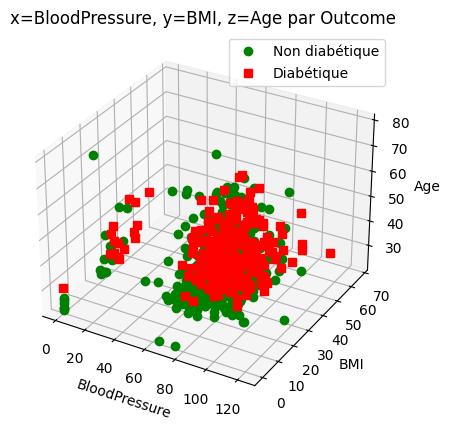

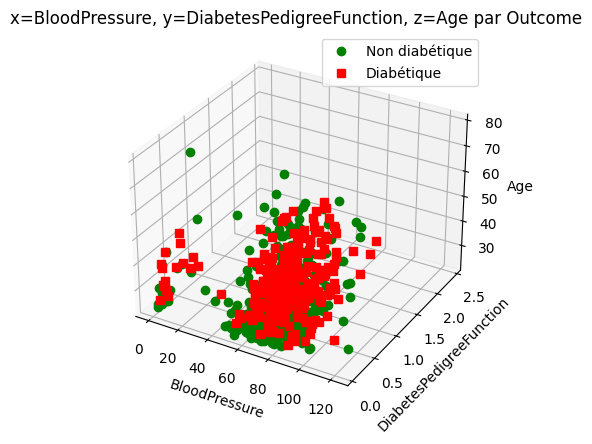

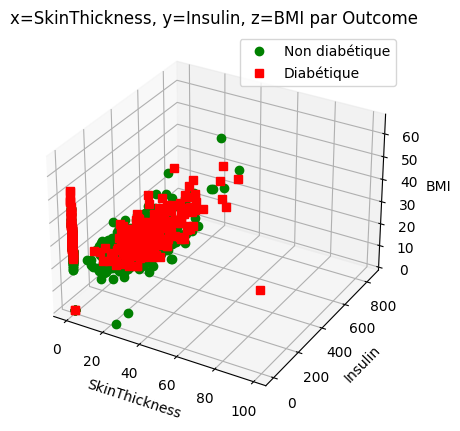

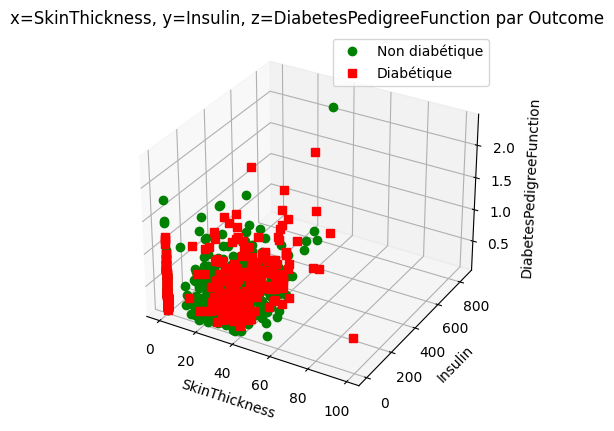

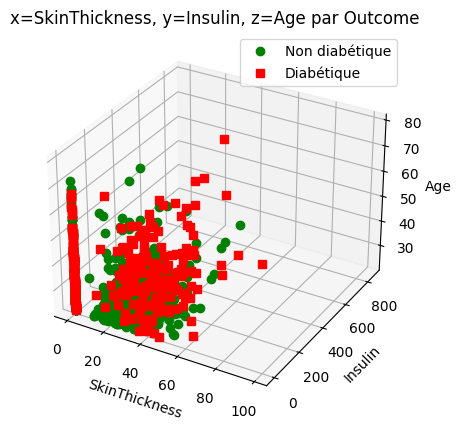

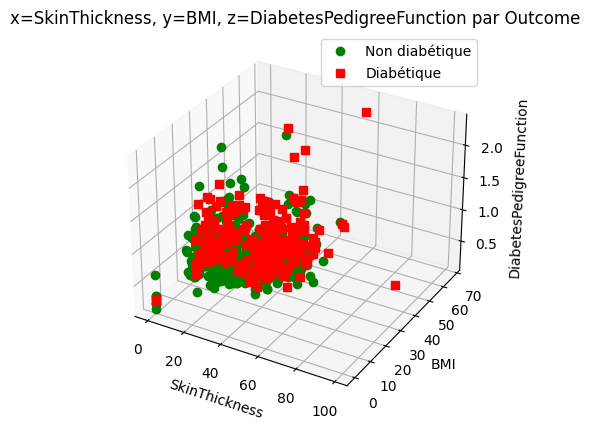

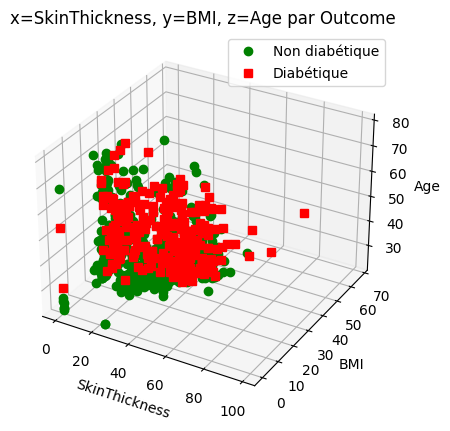

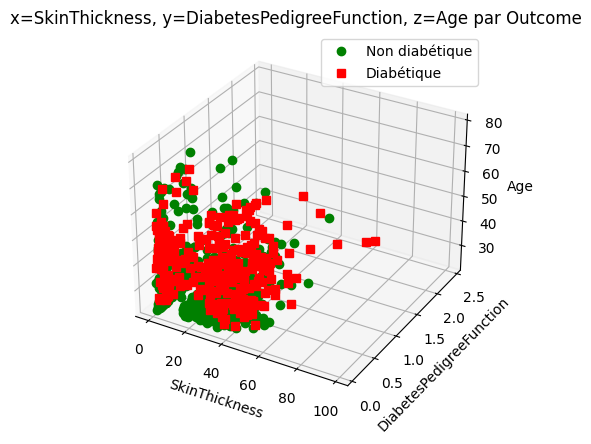

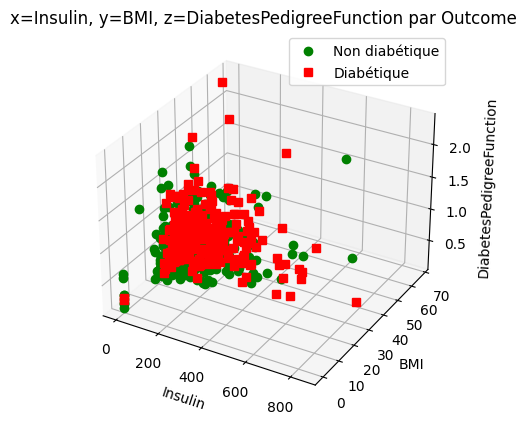

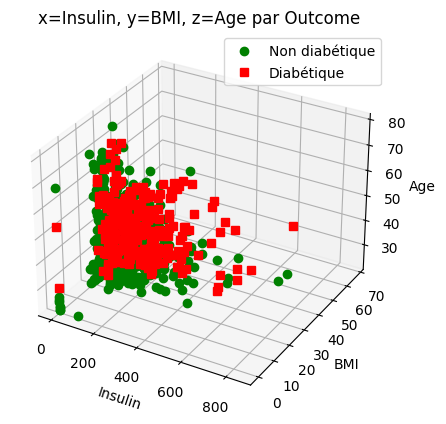

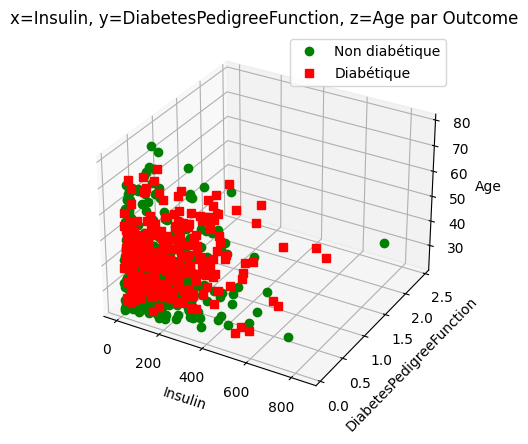

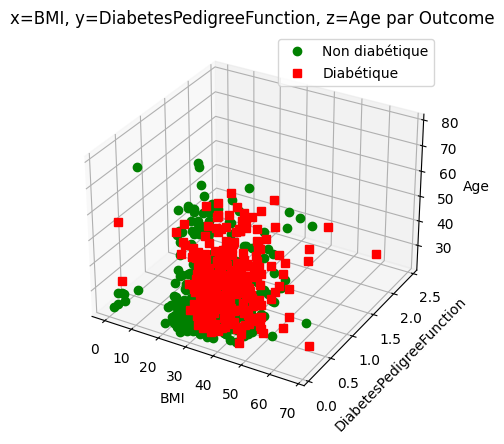

In [151]:
columns_started = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
draw_regression_3d_xgraphes(df_origin, columns_started, target_name)

In [ ]:
def draw_graph_with_prediction_line(col1, X_train, X_test, y_train):
    X1 = X_train[col1]

    # Create an instance of Logistic Regression Classifier and fit the data.
    model_logreg1 = LogisticRegression(solver="lbfgs", C=10, random_state=42, multi_class="multinomial")
    model_logreg1.fit(X1, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X1[col1[0]].min() - 0.5, X1[col1[0]].max() + 0.5
    y_min, y_max = X1[col1[1]].min() - 0.5, X1[col1[1]].max() + 0.5
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    y_proba = model_logreg1.predict_proba(X_test[col1])
    y_predict = model_logreg1.predict(X_test[col1])

    zz1 = y_proba[:,1].reshape(y_test.shape)
    zz = y_predict.reshape(y_test.shape)

    # Put the result into a color plot
    cmap_color = plt.cm.Purples

    figure, axes = plt.subplots(1,1)
    figure.patch.set_facecolor("white")
    # plt.pcolormesh(xx, yy, cmap=cmap_color)

    # Plot also the training points
    plt.plot(X1.loc[y_train==0, col1[0]], X1.loc[y_train==0, col1[1]], "go", label="Non diabetique")
    plt.plot(X1.loc[y_train==1, col1[0]], X1.loc[y_train==1, col1[1]], "rs", label="Diabetique")
    plt.xlabel(col1[0])
    plt.ylabel(col1[1])

    plt.legend()
    figure.set_size_inches(10, 5, forward=True)
    plt.show()

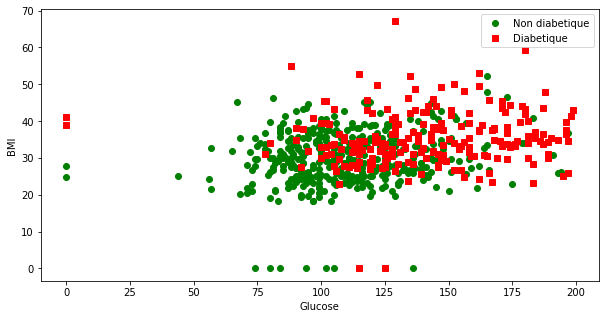

In [ ]:
col1 = ['Glucose', 'BMI']
X1 = X_train[col1]

# Create an instance of Logistic Regression Classifier and fit the data.
model_logreg1 = LogisticRegression(solver="lbfgs", C=10, random_state=42, multi_class="multinomial")
model_logreg1.fit(X1, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X1[col1[0]].min() - 0.5, X1[col1[0]].max() + 0.5
y_min, y_max = X1[col1[1]].min() - 0.5, X1[col1[1]].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

y_proba = model_logreg1.predict_proba(X_test[col1])
y_predict = model_logreg1.predict(X_test[col1])

zz1 = y_proba[:,1].reshape(y_test.shape)
zz = y_predict.reshape(y_test.shape)

# Put the result into a color plot
cmap_color = plt.cm.Purples

figure, axes = plt.subplots(1,1)
figure.patch.set_facecolor("white")
# plt.pcolormesh(xx, yy, cmap=cmap_color)

# Plot also the training points
plt.plot(X1.loc[y_train==0, col1[0]], X1.loc[y_train==0, col1[1]], "go", label="Non diabetique")
plt.plot(X1.loc[y_train==1, col1[0]], X1.loc[y_train==1, col1[1]], "rs", label="Diabetique")
plt.xlabel(col1[0])
plt.ylabel(col1[1])

plt.legend()
figure.set_size_inches(10, 5, forward=True)
plt.show()

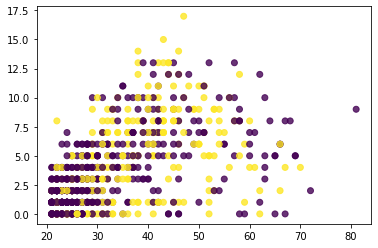

In [25]:
plt.scatter(X['Age'], X['Pregnancies'], c=y, alpha=0.8)

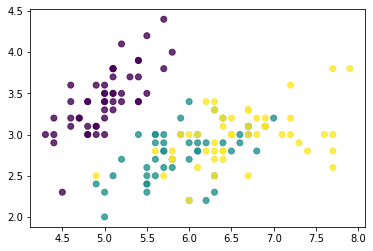

In [4]:


plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
# plt.legend()

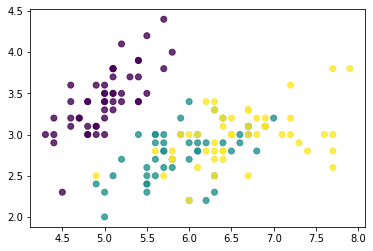

In [ ]:
X = df_origin[data_names]
y = df_origin[target_name]

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
# plt.legend()

In [5]:
type(iris)

sklearn.utils.Bunch

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df = pd.DataFrame(iris.data)
df['type'] = y.tolist()


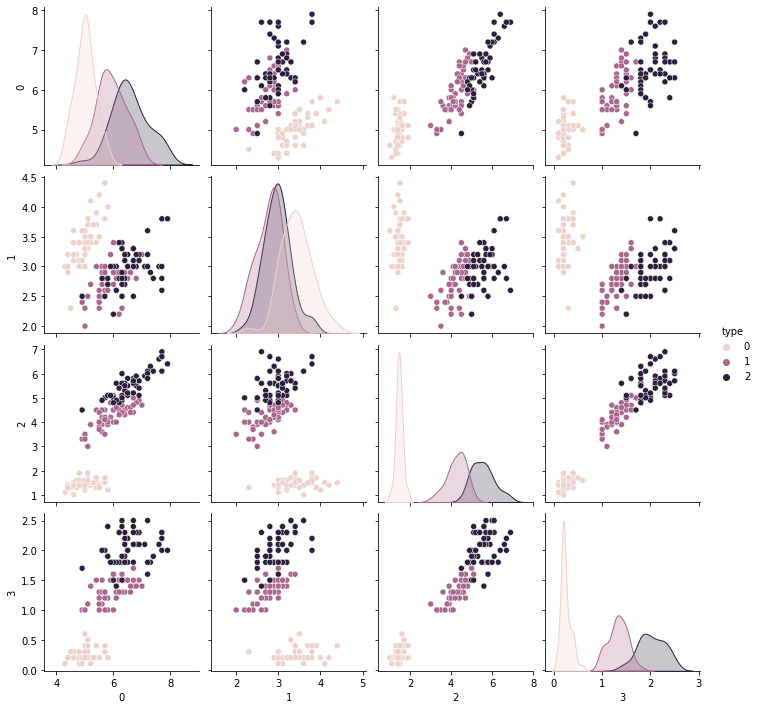

In [8]:
#sns.set_palette('husl')
g = sns.pairplot(df, hue='type')

In [9]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(accuracy_score(y, y_pred))

0.9733333333333334


C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
logreg = LogisticRegression(solver="liblinear", C=10, random_state=42)
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(accuracy_score(y, y_pred))

0.9666666666666667


In [26]:
iris.data.shape

(150, 4)

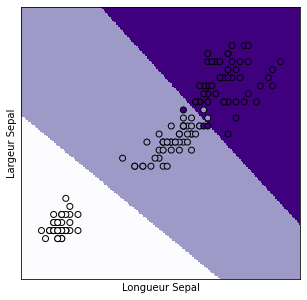

In [23]:
X = iris.data[:, 2:4]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
cmap_color = plt.cm.Purples
# Put the result into a color plot
Z = Z.reshape(xx.shape)
figure, axes = plt.subplots(1,1)
figure.patch.set_facecolor("white")
plt.pcolormesh(xx, yy, Z, cmap=cmap_color)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=cmap_color)
plt.xlabel("Longueur Sepal")
plt.ylabel("Largeur Sepal")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
figure.set_size_inches(5, 5, forward=True)
plt.show()

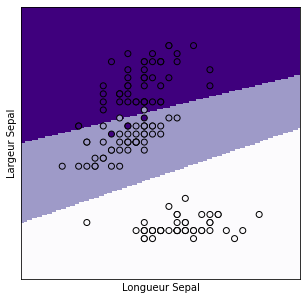

In [35]:
X = iris.data[:, [1, 3]]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
cmap_color = plt.cm.Purples
# Put the result into a color plot
Z = Z.reshape(xx.shape)
figure, axes = plt.subplots(1,1)
figure.patch.set_facecolor("white")
plt.pcolormesh(xx, yy, Z, cmap=cmap_color)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=cmap_color)
plt.xlabel("Longueur Sepal")
plt.ylabel("Largeur Sepal")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
figure.set_size_inches(5, 5, forward=True)
plt.show()

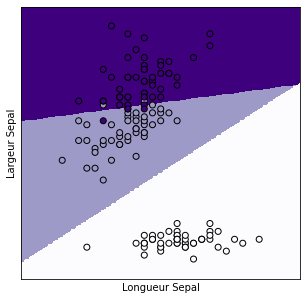

In [ ]:
X = iris.data[:, 1:3]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
cmap_color = plt.cm.Purples
# Put the result into a color plot
Z = Z.reshape(xx.shape)
figure, axes = plt.subplots(1,1)
figure.patch.set_facecolor("white")
plt.pcolormesh(xx, yy, Z, cmap=cmap_color)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=cmap_color)
plt.xlabel("Longueur Sepal")
plt.ylabel("Largeur Sepal")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
figure.set_size_inches(5, 5, forward=True)
plt.show()

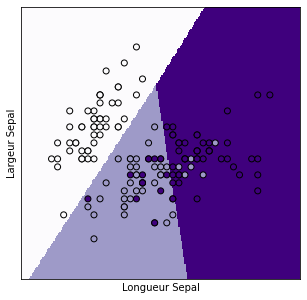

In [ ]:
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
cmap_color = plt.cm.Purples
# Put the result into a color plot
Z = Z.reshape(xx.shape)
figure, axes = plt.subplots(1,1)
figure.patch.set_facecolor("white")
plt.pcolormesh(xx, yy, Z, cmap=cmap_color)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=cmap_color)
plt.xlabel("Longueur Sepal")
plt.ylabel("Largeur Sepal")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
figure.set_size_inches(5, 5, forward=True)
plt.show()

In [21]:
X = iris.data  # we only take the first two features.

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, y)
# logreg.score()

LogisticRegression(C=100000.0)

In [ ]:
[0]Logistic Regression Training Accuracy: 0.6661237785016286
[1]K Nearest Neighbor Training Accuracy: 0.750814332247557
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.6514657980456026
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.6938110749185668
[4]Gaussian Naive Bayes Training Accuracy: 0.6758957654723127
[5]Decision Tree Classifier Training Accuracy: 0.8403908794788274
[6]Random Forest Classifier Training Accuracy: 0.8338762214983714